# Football Expected Goals Analysis Report

This project concerns football and statistics, specifically expected goals. This is a new concept for someone who watches the sport for more than 10 years. I decided to take a closer at how this statistic impact each club's performance per season based on the number of chances they create and number of goals they actually score.

In a low-scoring sport such as football, the final score alone is not a true reflection of how the game unfolds. This is why sports statisticians turn to model like expected goals to measure the quality of chances created and conceded in each game. The following report covers the entire season for 6 of European's most elite football leagues: England, Italy, Spain, Germany, France, and Russia

## Hypotheses 

1. Some leagues will not complete a part of this season due to the ongoing pandemic

2. The team that has a higher expected goal number does not necessary score more goals, given that football is a low-scoring sport.

3. The team that wins a game will have a higher expected points tally.

# Import Library

First of all, as usual, let's import the necessary libraries for this project

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Import Data

Read in the data from the Data directory

There's only one file in it: **understat_per_game.csv**: League results from the top 6 European leagues, with the addition of expected goals and expected points statistics

In [3]:
!ls data

understat_per_game.csv


Let's create a variable named **stats_per_game** and read in this file

In [4]:
stats_per_game = pd.read_csv('data/understat_per_game.csv')

Let's take a quick look into the head of these dataframes:

In [5]:
stats_per_game.head()

,league,year,date,team,h_a,scored,missed,result,pts,xG,xGA,npxG,npxGA,xpts,npxGD,xG_diff,xGA_diff,xpts_diff
0,Bundesliga,2014,22/08/2014 19:30,Bayern Munich,h,2,1,w,3,2.57012,1.198420,2.57012,1.198420,2.3486,1.371700,0.57012,0.198420,-0.6514
1,Bundesliga,2014,30/08/2014 17:30,Bayern Munich,a,1,1,d,1,1.50328,1.307950,1.50328,1.307950,1.5143,0.195330,0.50328,0.307950,0.5143
2,Bundesliga,2014,13/09/2014 14:30,Bayern Munich,h,2,0,w,3,1.22987,0.310166,1.22987,0.310166,2.1588,0.919704,-0.77013,0.310166,-0.8412
3,Bundesliga,2014,20/09/2014 14:30,Bayern Munich,a,0,0,d,1,1.03519,0.203118,1.03519,0.203118,2.1367,0.832072,1.03519,0.203118,1.1367
4,Bundesliga,2014,23/09/2014 19:00,Bayern Munich,h,4,0,w,3,3.48286,0.402844,3.48286,0.402844,2.9287,3.080016,-0.51714,0.402844,-0.0713


When we check the shape of the dataframe, we see there are more than **24000** rows and 18 columns. That might sounds a lot for a database on football from 2014 for only 6 European leagues. But in reality, this dataframe consists of the results from each club for each individual game throughout all 6 seasons.

In [6]:
stats_per_game.shape

(24580, 18)

# Check for missing data

Before we can do data analysis, let's check if there's any missing data in the dataframe.

In [7]:
stats_per_game.isnull().head()

,league,year,date,team,h_a,scored,missed,result,pts,xG,xGA,npxG,npxGA,xpts,npxGD,xG_diff,xGA_diff,xpts_diff
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Everything is **False** here, so we're good to go ahead with the dataframe!

# Time for Analyzing the Data

First, let's just check to make sure there are only 6 leagues in this dataframe

In [8]:
pd.Series(stats_per_game['league'].unique()).sort_values(ascending=True)

0    Bundesliga
1           EPL
2       La_liga
3       Ligue_1
4          RFPL
5       Serie_A
dtype: object

Great! Now we want to see how many times each league is represented in the dataframe

In [9]:
stats_per_game['league'].dropna().value_counts(dropna=False)

La_liga       4560
EPL           4560
Serie_A       4550
Ligue_1       4358
Bundesliga    3672
RFPL          2880
Name: league, dtype: int64

If we look at the frequency of how many times a particular league appears in the database, we notice that EPL, La Liga, and Serie A has similar numbers, while the remaining leagues appear less. But why?

The number of games in any football league depends on the **number of participating clubs**. For example, there are 20 clubs participating in EPL, La Liga, Serie A, and Ligue 1 (18 in Bundesliga and 16 for Russian League) , and that means a total of **380 games** per season. **Since we are showing the results for each club individually for each game**, we multiply by 2 and get 760 rows of database. Finally, we multiply 760 by 6 (number of years in this data) and get the number above.

**Note 1**: Since the Ligue 1 2019-20 season was cancelled after playing 28 rounds due to the Covid-19 pandemic, there are only 4358 rows of data for this league, including only partial data for the 2019-20 season

**Note 2**: For Serie A, there were 5 incompleted games that were not included in the database when I download the database. So there are only 4550 rows of data for this league

-------------------------------------------------------------------------------------------------------------------------------

Let's look at the stats for goals scored by a club per match using describe()

In [10]:
stats_per_game['scored'].describe()

count    24580.000000
mean         1.341009
std          1.244176
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max         10.000000
Name: scored, dtype: float64

There are more than 24000 matches in this database. However, the average (mean) goals scored is pretty low at 1.341. This is not surprising considering that football/soccer is a low-scoring sport, and goals are pretty rare event.

------------------------------------------------------------------------------------------------------------------------------

If we plot the frequency of goals scored per match in a bar chart, we see that most games of football will have very few goals (between 0-3 goals). It's rare to see any club crushing the opposition by more than 5 goals (even rarer by 10 goals).

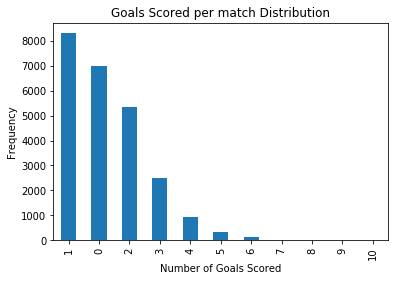

In [11]:
stats_per_game['scored'].value_counts().plot(kind='bar');
plt.ylabel('Frequency')
plt.xlabel('Number of Goals Scored')
plt.title('Goals Scored per match Distribution');

# Expected Goals Analysis

Expected goal is a statistical measurement of the quality of goalscoring chances and the likelihood of them being scored. The number for this stat is in decimals.

The first histogram will take a look at the overall distribution of expected goals.

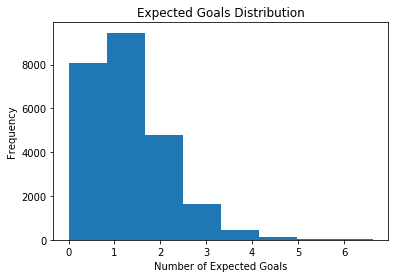

In [12]:
stats_per_game.xG.plot(kind='hist', bins=8)
plt.ylabel('Frequency')
plt.xlabel('Number of Expected Goals')
plt.title('Expected Goals Distribution');

As we can see, most team is expected to score between 0 and 3 goals in a match. This match with our early claim that football is a rare-scoring sport, and it's normal to see few goals (or no goal) in a game.


In [13]:
stats_per_game[['team','scored','xG']]

,team,scored,xG
0,Bayern Munich,2,2.570120
1,Bayern Munich,1,1.503280
2,Bayern Munich,2,1.229870
3,Bayern Munich,0,1.035190
4,Bayern Munich,4,3.482860
...,...,...,...
24575,Lecce,1,0.448154
24576,Lecce,1,1.699320
24577,Lecce,3,2.535110
24578,Lecce,2,2.247360


-------------------------------------------------------------------------------------------------------------------------------

## 1. Expected Goals for Clubs with xG higher than 2 but didn't score any goal

Below is a histogram showing the distribution of clubs accumulating more than 2 expected goals but didn't score in the match.

Sometimes, creating many shots and goal-scoring opportunities doesn't mean the team would definitely score goals. That is why it is absolutely crucial to take the chances and score goals.

In [14]:
no_goals = stats_per_game[(stats_per_game['xG'] > 2) & (stats_per_game['scored'] == 0)]
no_goals.shape

(167, 18)

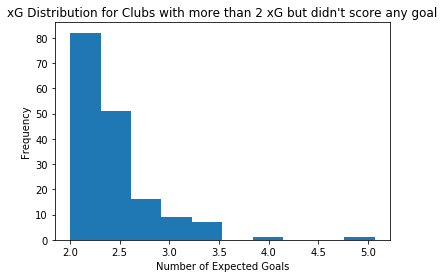

In [15]:
no_goals.xG.plot(kind='hist', bins=10)
plt.ylabel('Frequency')
plt.xlabel('Number of Expected Goals')
plt.title("xG Distribution for Clubs with more than 2 xG but didn't score any goal");

## 2. Expected Goals Distribution for Clubs that create few shots but win the matches

In other cases, a club might create very few chances and shots to threaten the opposition, but they managed to get the win. This histogram shows the distribution of how many times expected goals were **less than 1**. This statistic shows how important it is to score a goal, and not just creating chances that would be squandered.

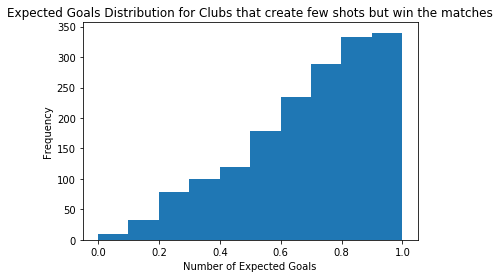

In [16]:
goals_but_low_xG = stats_per_game[(stats_per_game['xG'] < 1) & (stats_per_game['result'] == "w")]
goals_but_low_xG.xG.plot(kind='hist', bins=10)
plt.ylabel('Frequency')
plt.xlabel('Number of Expected Goals')
plt.title("Expected Goals Distribution for Clubs that create few shots but win the matches");

## 3. Expected Goals without penalties and own goals

Let's take a look at this chart below:

In [17]:
goals_with_penalties = stats_per_game[(stats_per_game['xG'] > stats_per_game['npxG'])]
goals_with_penalties[['team', 'scored', 'xG', 'npxG']]

,team,scored,xG,npxG
7,Bayern Munich,6,2.49826,1.740490
9,Bayern Munich,2,2.64367,1.886050
20,Bayern Munich,8,4.17851,3.420730
21,Bayern Munich,6,3.12815,2.370380
23,Bayern Munich,3,1.33559,0.577811
...,...,...,...,...
24571,Lecce,1,1.75314,0.991880
24572,Lecce,2,2.04843,1.287140
24573,Lecce,2,3.02321,2.261910
24576,Lecce,1,1.69932,0.938022


npxG is the number of expected goals **WITHOUT** penalties or own goals. So we can assume that for the chart below, each club has at least score one penalty in the game, which put the xG stats much higher. 

I will create a new column called **npxG_diff**: the difference between expected goals with and without penalties and own goals.

In [18]:
stats_per_game['npxG_diff'] = stats_per_game['xG'] - stats_per_game['npxG']

Let's see the new chart with new column included:

In [19]:
goals_with_penalties = stats_per_game[(stats_per_game['xG'] > stats_per_game['npxG'])]
goals_with_penalties[['team', 'scored', 'xG', 'npxG', 'npxG_diff']]

,team,scored,xG,npxG,npxG_diff
7,Bayern Munich,6,2.49826,1.740490,0.757770
9,Bayern Munich,2,2.64367,1.886050,0.757620
20,Bayern Munich,8,4.17851,3.420730,0.757780
21,Bayern Munich,6,3.12815,2.370380,0.757770
23,Bayern Munich,3,1.33559,0.577811,0.757779
...,...,...,...,...,...
24571,Lecce,1,1.75314,0.991880,0.761260
24572,Lecce,2,2.04843,1.287140,0.761290
24573,Lecce,2,3.02321,2.261910,0.761300
24576,Lecce,1,1.69932,0.938022,0.761298


If we notice, the npxG_diff for every club that has a higher xG than npxG is **0.75 or higher**. Why is that?

Because all penalties are the same: they are 12 yards from the goal, and every player taking the penalties take it from the same position. 0.75 is the expected goal for a penalty, which means there is a 75% of successfully scoring from the spot.

## Expected Points Analysis

In the football rulebook, a win is worth **3 points**, a draw is **1 point**, and a loss is **0 points**. However, with the expected points statistics, we have a more realistic look at how many points the club is expected to earn based on the quality of their chances and how those chances would have affected the match in the long run.

The chart below shows a distribution from 0 expected points to 3 (the most points a club can earn for a win)

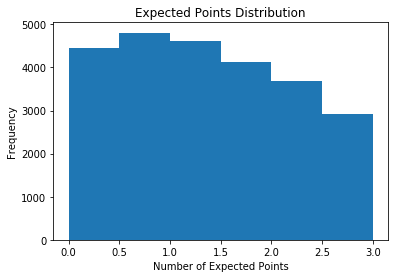

In [20]:
stats_per_game.xpts.plot(kind='hist', bins=6)
plt.ylabel('Frequency')
plt.xlabel('Number of Expected Points')
plt.title('Expected Points Distribution');

In [21]:
stats_per_game['xpts'].describe()

count    24580.000000
mean         1.378563
std          0.823751
min          0.000000
25%          0.673950
50%          1.328900
75%          2.051025
max          3.000000
Name: xpts, dtype: float64

As shown in the chart, most teams are likely to earn around 0.5-1.5 expected points. This means that they might have create a lot of chances but they didn't score as much, while letting conceding goal-scoring opportunities from the opponent.

This list below shows how some clubs are expected to earn much fewer points despite winning the match. xpts_diff is the difference between actual points earned and expected points.

In [22]:
win_but_low_xpts = stats_per_game[(stats_per_game['result'] == 'w' ) & (stats_per_game['xpts'] < 1)]
win_but_low_xpts[['team', 'scored', 'missed', 'xG', 'xGA','xpts', 'xpts_diff']]

,team,scored,missed,xG,xGA,xpts,xpts_diff
53,Hamburger SV,2,1,0.674771,2.24545,0.3214,-2.6786
93,Bayer Leverkusen,1,0,1.317400,1.79663,0.9871,-2.0129
95,Bayer Leverkusen,3,2,0.970257,2.21349,0.4237,-2.5763
152,Augsburg,2,1,1.655610,2.17588,0.9716,-2.0284
164,Augsburg,2,1,1.144010,2.41152,0.4976,-2.5024
...,...,...,...,...,...,...,...
24450,SPAL 2013,2,1,1.210910,2.45221,0.5803,-2.4197
24482,Parma Calcio 1913,1,0,0.602606,1.19231,0.8429,-2.1571
24483,Parma Calcio 1913,2,1,1.292770,1.88263,0.9867,-2.0133
24491,Parma Calcio 1913,1,0,0.819298,1.39228,0.8363,-2.1637


There are several factors that contribute to this unusual outcome. It could be that the winning team is expected to score fewer goals than they actually scored, meaning that they take their chances and score. It could also mean that they are expected to concede more goals (xGA) than they actually missed in the match, which has a negative affect on the expected points earned for that game.

-------------------------------------------------------------------------------------------------------------------------------

# Conclusion

- The team that creates more chances does not always win the game; which is why it's crucial to take those chances and score

- The team that wins a game does not necessarily get a high expected points tally; it's just means that the opponent created more chances but they didn't score.

# Future Research

- I will look into which player is creating the most chances in a game, and what's their goal conversion rate, so we can judge if he is a consistent goal scorer or not.
- I will look closer into each chance a team create in the match, and see what their actual xG is for that opportunity.